In [2]:
import tensorflow as tf
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import numpy as np
import cv2

In [3]:
#ایجاد پیش نیاز ها متغییر های لازم
#آدرس پوشه دیتا ست
Data1="./dataset_farsi/"
#x , y های  دیتا ست
Dimension=[]
Label=[]
file=os.listdir(Data1)

In [4]:
#حلقه برای خواندن هر پوشه داخل فلدر اصلی دیتا ست
for folder in file:
    folder_all = os.path.join(Data1, folder)


    #حلقه برای خواندن عکس های داخل پوشه ها
    for pic in os.listdir(folder_all):
        pic_all=os.path.join(folder_all, pic)
        im = cv2.imread(pic_all)

        #تبدیل تمام عکس ها به سیاه سفید
        im2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

        #یک اندازه کردن تمام عکی ها برای تمیزی دیتا ها
        im3 = cv2.resize(im2, (28,28))

        #اضافه کردن آرایه هر عکس به عنوان یک دایمنشن
        Dimension.append(im3)

        #اضافه کردن لیبل برای هر دایمنشن
        Label.append(folder)


x = np.array(Dimension)
y = np.array(Label)

print("Dimension shape:", x.shape)
print("Label shape:", y.shape)           
            

Dimension shape: (80000, 28, 28)
Label shape: (80000,)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.18)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

In [6]:
X_train=np.expand_dims(X_train,axis=3)
X_test=np.expand_dims(X_test,axis=3)

In [7]:
X_train.shape

(65600, 28, 28, 1)

In [8]:
model=Sequential()
model.add(Conv2D(filters=8,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(28,28,1)
          ))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 32)                43296     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 43,706
Trainable params: 43,706
Non-trainable params: 0
____________________________________________________

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']  
              )

In [11]:
h=model.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.7062 - accuracy: 0.8980 - val_loss: 0.1650 - val_accuracy: 0.9625
Epoch 2/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.1225 - accuracy: 0.9695 - val_loss: 0.1226 - val_accuracy: 0.9721
Epoch 3/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.0828 - accuracy: 0.9776 - val_loss: 0.0936 - val_accuracy: 0.9788
Epoch 4/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.0572 - accuracy: 0.9842 - val_loss: 0.0654 - val_accuracy: 0.9822
Epoch 5/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0603 - val_accuracy: 0.9846
Epoch 6/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.0397 - accuracy: 0.9886 - val_loss: 0.0704 - val_accuracy: 0.9829
Epoch 7/20
2050/2050 [==============================] - 6s 3ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0602 - val_accuracy:

In [11]:
model.save('ocr-farsi-0.h5')

In [12]:
pretest = model.predict(X_test)

450/450 [==============================] - 1s 1ms/step


In [13]:
pretest[75]

array([ 47.55489 ,  88.3691  ,  78.59645 ,  56.812973,  56.26577 ,
       -23.443865, 124.76405 ,  73.58145 , -18.583565,  72.553696],
      dtype=float32)

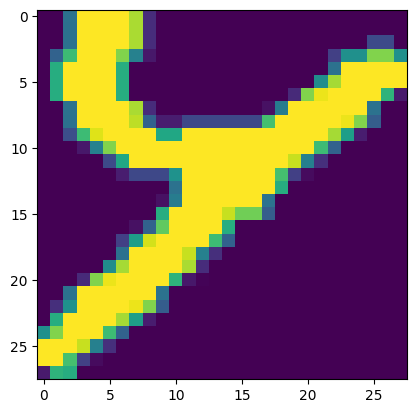

6


In [14]:
plt.close()
plt.imshow(X_test[75])
plt.show()
print(Y_test[75])

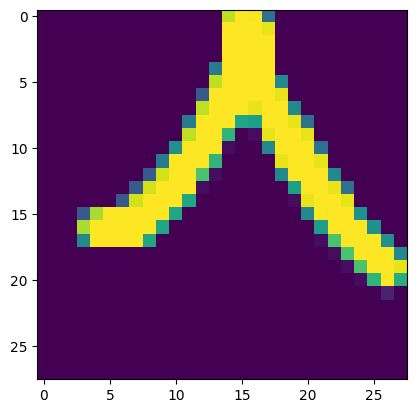

(1, 28, 28, 1)
1/1 [==============================] - 0s 42ms/step
میزان امتیاز 82.29446411132812 عدد شما = 8. می باشد


In [15]:
img_test = cv2.imread('test-0-8.png')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)  # Convert to RGB color space
img_test = cv2.resize(img_test, (28, 28))
#img1 = img1 / 255.0

plt.close()
plt.imshow(img_test)
plt.show()



img_test = np.expand_dims(img_test, axis=2)
img_test = np.expand_dims(img_test, axis=0)

print(img_test.shape)
predimg1 = model.predict(img_test)




# Find the index of the largest number
max_index = np.argmax(predimg1)

# Find the largest number
largest_number = predimg1[0, max_index]

print(f"میزان امتیاز {largest_number} عدد شما = {max_index}. می باشد")


loaded


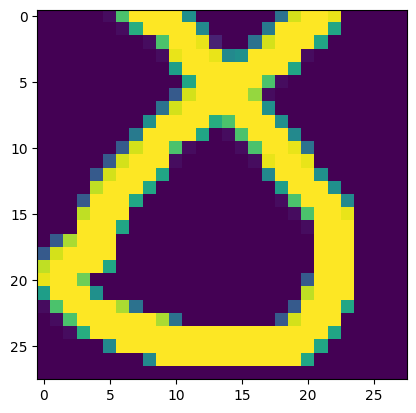

(1, 28, 28, 1)
1/1 [==============================] - 0s 38ms/step
 عدد شما =>>>✅>>>> 5 <<<<✅<<<. می باشد


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf
from keras import datasets, layers, models
from matplotlib import pyplot as plt 
import cv2
import numpy as np
import os
import cv2
import numpy as np


model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.load_weights('ocr-farsi-0.h5')

img1 = cv2.imread('test-0-5.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # Convert to RGB color space
img1 = cv2.resize(img1, (28, 28))
#img1 = img1 / 255.0

plt.close()
plt.imshow(img1)
plt.show()



img1 = np.expand_dims(img1, axis=2)
img1 = np.expand_dims(img1, axis=0)

print(img1.shape)
predimg1 = model.predict(img1)




# Find the index of the largest number
max_index = np.argmax(predimg1)

# Find the largest number
largest_number = predimg1[0, max_index]

print(f" عدد شما =>>>✅>>>> {max_index} <<<<✅<<<. می باشد")
